In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel(r"C:\Users\vishal\OneDrive\Desktop\case study\online+retail\Online Retail.xlsx")

In [5]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.dropna(subset=["CustomerID"], inplace=True)

In [7]:
# Step 2: Create RFM Metrics
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
recency = (df['InvoiceDate'].max() - df.groupby('CustomerID')['InvoiceDate'].max()).dt.days
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()
monetary = df.groupby('CustomerID')['TotalPrice'].sum()

In [8]:
rfm = pd.DataFrame({"Recency": recency, "Frequency": frequency, "Monetary": monetary})

In [9]:
# Step 3: Normalize Data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [10]:
# Step 4: Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

C:\Users\vishal\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


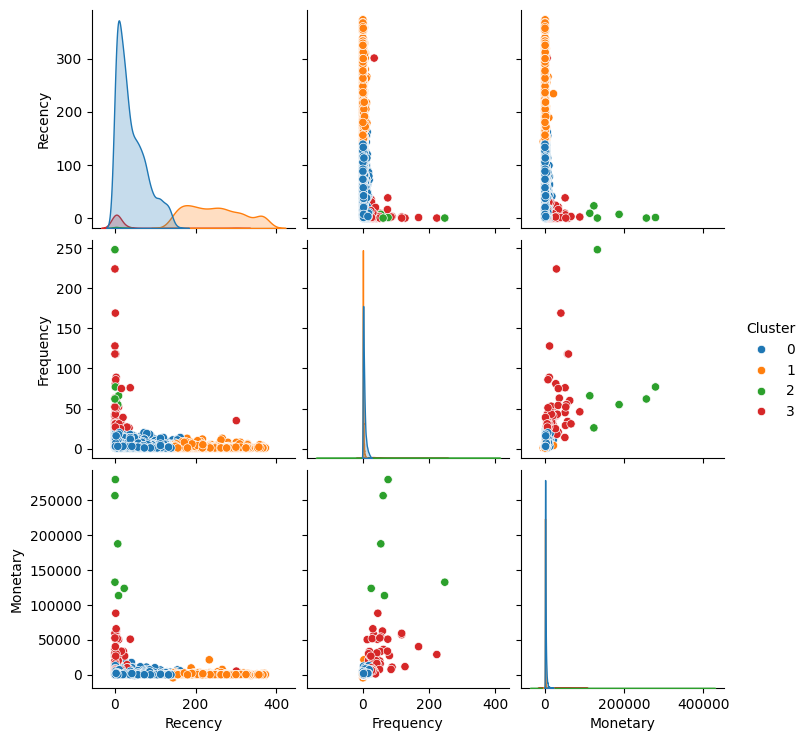

In [11]:
# Step 5: Visualize Clusters
sns.pairplot(rfm, hue='Cluster', palette='tab10')
plt.show()

In [12]:
# Step 6: Interpret Clusters
print(rfm.groupby('Cluster').mean())

            Recency  Frequency       Monetary
Cluster                                      
0         40.606500   4.802461    1478.515539
1        246.951242   1.805888     453.488888
2          6.666667  89.000000  182181.981667
3          8.181818  40.672727   18441.961455
